In [79]:
# Import dependencies
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# Get all file names in datasets directory
all_csv_files = [pd.read_csv(filename) for filename in glob.glob("./datasets/*.csv")]

In [82]:
# Display all csv files in datasets directory and verify 50 are present
print(len(all_csv_files))

50


In [83]:
# Create the complete dataset from files in datasets directory
df = pd.concat(all_csv_files, axis=0)
df.head()

,sale_time,purchaser_gender
0,2013-01-07 02:14:07,female
1,2013-01-07 02:57:53,male
2,2013-01-07 02:59:49,female
3,2013-01-07 03:02:53,male
4,2013-01-07 03:27:36,female


In [84]:
# Check datatypes from df
df.dtypes

sale_time           object
purchaser_gender    object
dtype: object

In [85]:
# Convert sale_time to datetime object
df['sale_time'] = pd.to_datetime(df['sale_time'])
sales_day = pd.to_datetime(df['sale_time'])

In [86]:
# Check datatypes from df
df.dtypes

sale_time           datetime64[ns]
purchaser_gender            object
dtype: object

In [87]:
# Check for null values
df.isnull().sum()

sale_time           0
purchaser_gender    0
dtype: int64

In [88]:
# Calculate number of sales by gender per day
sum = df.groupby(df.sale_time.dt.day)['purchaser_gender'].value_counts()
print(sum)

sale_time  purchaser_gender
1          female              3757
           male                3199
2          female              3832
           male                3311
3          female              3727
                               ... 
29         male                2919
30         female              3136
           male                2919
31         female              2199
           male                2127
Name: purchaser_gender, Length: 62, dtype: int64


In [89]:
sales_day

0      2013-01-07 02:14:07
1      2013-01-07 02:57:53
2      2013-01-07 02:59:49
3      2013-01-07 03:02:53
4      2013-01-07 03:27:36
               ...        
4970   2013-08-18 23:05:04
4971   2013-08-18 23:07:48
4972   2013-08-18 23:10:08
4973   2013-08-18 23:25:14
4974   2013-08-18 23:30:16
Name: sale_time, Length: 204329, dtype: datetime64[ns]

In [90]:
# Calculate total number of sales by day
daily_sales_df = sales_day.groupby(sales_day.dt.floor('d')).size().reset_index(name='sales_amount')
daily_sales_df

,sale_time,sales_amount
0,2012-10-01,514
1,2012-10-02,482
2,2012-10-03,499
3,2012-10-04,546
4,2012-10-05,476
...,...,...
345,2013-09-11,719
346,2013-09-12,735
347,2013-09-13,743
348,2013-09-14,655


In [92]:
# Set index to sales_day to make plotting easier
daily_sales_df.index = daily_sales_df['sale_time']
daily_sales_df.drop(columns=['sale_time'], inplace=True)
daily_sales_df 

,sales_amount
sale_time,
2012-10-01,514
2012-10-02,482
2012-10-03,499
2012-10-04,546
2012-10-05,476
...,...
2013-09-11,719
2013-09-12,735
2013-09-13,743


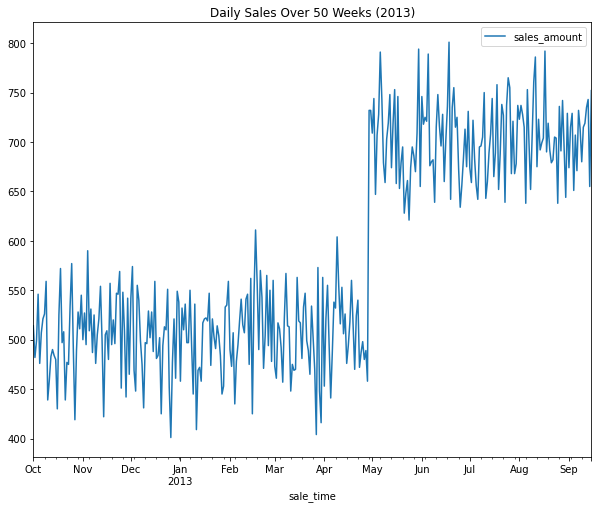

In [93]:
# Set constant figure size
figure_size = (10,8)
# Plot daily sales for all 50 weeks
daily_sales_df.plot(figsize=figure_size, title="Daily Sales Over 50 Weeks (2013)")
plt.show()